# ** Solving problems**

The European Soccer Database contains data about 12,800 matches from 11 countries played between 2011-2015!
In this exercise, you will identify matches played between FC Schalke 04 and FC Bayern Munich. There are 2 teams identified in each match in the hometeam_id and awayteam_id columns, available to you in the filtered matches_germany table. ID can join to the team_api_id column in the teams_germany table, but you cannot perform a join on both at the same time.
However, you can perform this operation using a CASE statement once you've identified the team_api_id associated with each team!
Select the team's long name and API id from the teams_germany table.
Filter the query for FC Schalke 04 and FC Bayern Munich using IN, giving you the team_api_IDs needed for the next step.

In [ ]:
SELECT
	team_long_name,
	team_api_id
FROM teams_germany
WHERE team_long_name in ('FC Schalke 04', 'FC Bayern Munich');

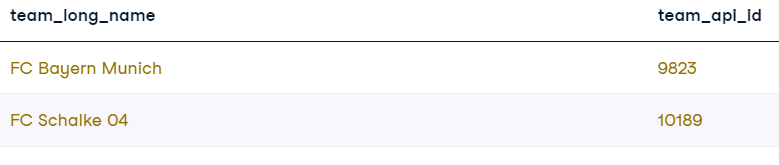

Create a CASE statement that identifies whether a match in Germany included FC Bayern Munich, FC Schalke 04, or neither as the home team.
Group the query by the CASE statement alias, home_team.

In [ ]:
SELECT
        CASE when hometeam_id = 10189 then 'FC Schalke 04'
        when hometeam_id = 9823 then 'FC Bayern Munich'
         ELSE 'Other' END AS home_team,
	COUNT(id) AS total_matches
FROM matches_germany
GROUP BY home_team;

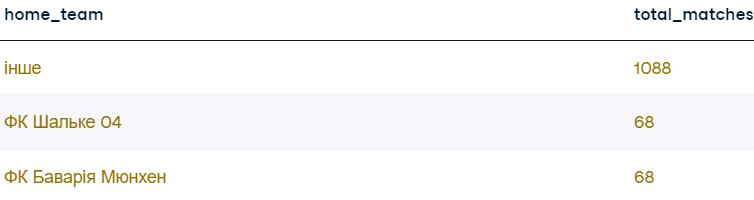

Barcelona is considered one of the strongest teams in Spain's soccer league.
In this exercise, you will be creating a list of matches in the 2011/2012 season where Barcelona was the home team.
The matches_spain table currently contains Barcelona's matches from the 2011/2012 season, and has two key columns, hometeam_id and awayteam_id, that can be joined with the teams_spain table. However, you can only join teams_spain to one column at a time.
Select the date of the match and create a CASE statement to identify matches as home wins, home losses, or ties.

In [ ]:
SELECT
	date,
	case when home_goal > away_goal then 'Home win!'
        when home_goal < away_goal then 'Home loss :('
        else 'Tie' end as outcome
FROM matches_spain;

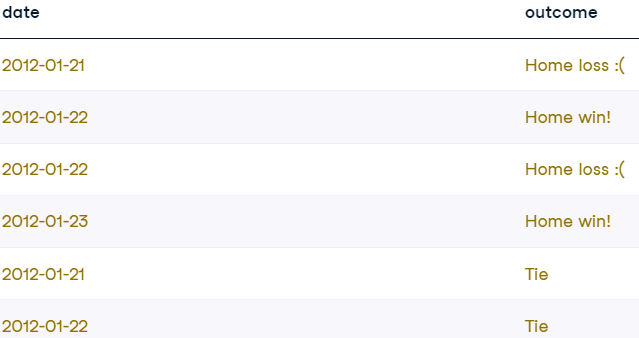

Left join the teams_spain table team_api_id column to the matches_spain table awayteam_id. This allows us to retrieve the away team's identity.
Select team_long_name from teams_spain as opponent and complete the CASE statement from Step 1.

In [ ]:
SELECT
	m.date,
  t.team_long_name AS opponent,
	CASE when m.home_goal > m.away_goal then 'Home win!'
        when m.home_goal < m.away_goal then 'Home loss :('
        else 'Tie' end as outcome
FROM matches_spain AS m
Left join teams_spain AS t
on m.awayteam_id = t.team_api_id;

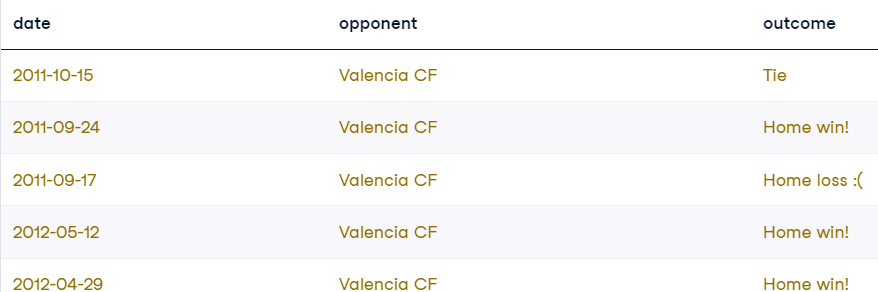

Filter for matches where the home team is FC Barcelona (id = 8634).

In [ ]:
SELECT
	m.date,
	t.team_long_name AS opponent,
  case when m.home_goal > m.away_goal then 'Barcelona win!'
       when m.home_goal < m.away_goal then 'Barcelona loss :('
       else 'Tie' end as outcome
FROM matches_spain AS m
LEFT JOIN teams_spain AS t
ON m.awayteam_id = t.team_api_id
WHERE m.hometeam_id = 8634;

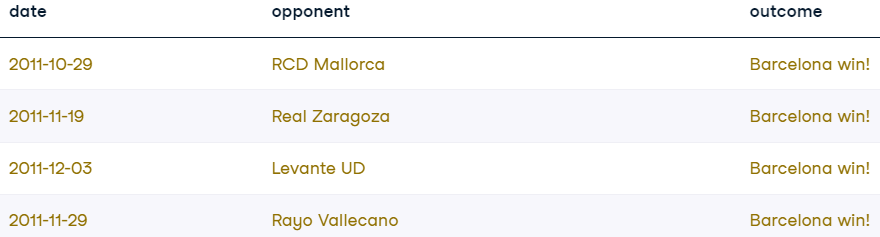

Complete the CASE statement to identify Barcelona's away team games (id = 8634) as wins, losses, or ties.
Left join the teams_spain table team_api_id column on the matches_spain table hometeam_id column. This retrieves the identity of the home team opponent.
Filter the query to only include matches where Barcelona was the away team.

In [ ]:
SELECT
	m.date,
	t.team_long_name AS opponent,
  case when m.home_goal < m.away_goal then 'Barcelona win!'
       when m.home_goal > m.away_goal then 'Barcelona loss :('
       else 'Tie' end as outcome
FROM matches_spain AS m
LEFT JOIN teams_spain AS t
ON m.hometeam_id = t.team_api_id
WHERE m.awayteam_id = 8634;

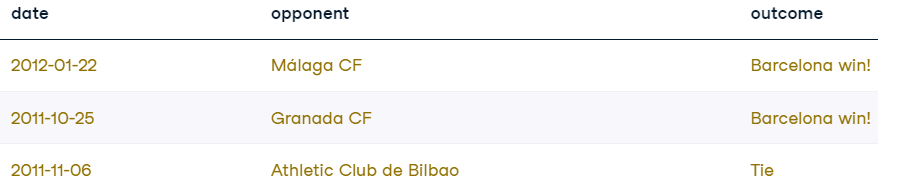